## 异常值检测

In [3]:
# -*- coding:utf-8 -*-
import pandas as pd

In [16]:
catering_sale = 'C:/Users/qyn/Desktop/新建学习/Python数据分析与挖掘实战/chapter3/demo/data/catering_sale.xls'
data = pd.read_excel(catering_sale, index_col=u'日期')     # 读取数据，并指定日期为索引列


In [10]:
import matplotlib.pyplot as plt
# pylot使用rc配置文件来自定义图形的各种默认属性，称之为rc配置或rc参数。通过rc参数可以修改默认的属性，
# 包括窗体大小、每英寸的点数、线条宽度、颜色、样式、坐标轴、坐标和网络属性、文本、字体等。
# rc参数存储在字典变量中，通过字典的方式进行访问
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #　用来正常显示负号   

[1. 1. 1. 1. 1. 1. 1. 1.]
[  22.     51.     60.    865.   4060.3  4065.2  6607.4  9106.44]
0 22.0 (1.0, 22.0) (1.08, 22.0)
1 51.0 (1.0, 51.0) (1.0224137931034483, 51.0)
2 60.0 (1.0, 60.0) (0.9611111111111111, 60.0)
3 865.0 (1.0, 865.0) (1.0490062111801242, 865.0)
4 4060.3 (1.0, 4060.3) (1.0497496322724, 4060.3)
5 4065.2 (1.0, 4065.2) (0.8867346938775389, 4065.2)
6 6607.4 (1.0, 6607.4) (1.0496853119345448, 6607.4)
7 9106.44 (1.0, 9106.44) (1.049679877072796, 9106.44)


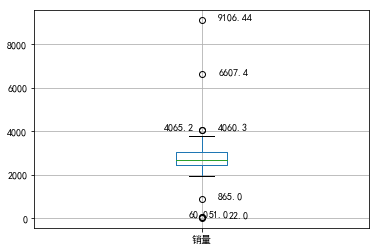

In [22]:
plt.figure()
p = data.boxplot(return_type='dict')    # 画箱线图，直接使用DataFrame的方法:    需指定返回p的类型，否则报错误：TypeError: 'AxesSubplot' ...
x = p['fliers'][0].get_xdata()         # 'files'为异常值标签
y = p['fliers'][0].get_ydata()
print(x)
y.sort()                             # 从小到大排序，该方法直接改变原对象
print(y)
for i in range(len(x)):             # 标注异常点
    if i > 0:
        print(i, y[i], (x[i], y[i]), (x[i] + 0.05 - 0.8/ (y[i]- y[i - 1]),y[i]))
        plt.annotate(y[i], xy = (x[i], y[i]), xytext = (x[i] + 0.05 - 0.8/ (y[i]- y[i - 1]),y[i]))
    else:
        print(i, y[i], (x[i], y[i]), (x[i] + 0.08, y[i]))
        plt.annotate(y[i], xy = (x[i], y[i]), xytext = (x[i] + 0.08, y[i]))

plt.show()

## 统计量分析

In [23]:
data = data[(data['销量'] > 400)&(data['销量'] < 5000)]   # 过滤异常数据
statistics = data.describe()
print(statistics)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000


In [27]:
statistics.loc['range'] = statistics.loc['max'] - statistics.loc['min']   # 极差
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean']     # 变异系数
statistics.loc['dis'] = statistics.loc['75%'] - statistics.loc['25%']   # 四分位间距
print(statistics)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000


## 贡献度（帕累托）分析

In [48]:
dish_profit = 'C:/Users/qyn/Desktop/新建学习/Python数据分析与挖掘实战/chapter3/demo/data/catering_dish_profit.xls'
dish = pd.read_excel(dish_profit, index_col=u'菜品名')   
dis = dish[u'盈利'].copy()
dis.sort_values(ascending=False)
print(type(dis),'\n',dis)

<class 'pandas.core.series.Series'> 
 菜品名
A1     9173
A2     5729
A3     4811
A4     3594
A5     3195
A6     3026
A7     2378
A8     1970
A9     1877
A10    1782
Name: 盈利, dtype: int64


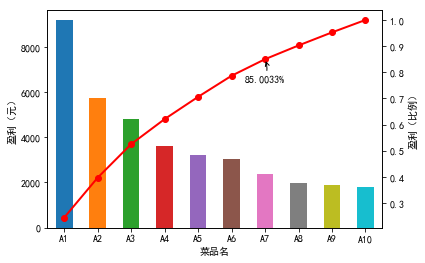

In [50]:
plt.figure()
dis.plot(kind='bar')
plt.ylabel(u'盈利（元）')
p = 1.0*dis.cumsum()/dis.sum()
p.plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
#添加注释，即85%处的标记。这里包括了指定箭头样式。
plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) 
plt.ylabel(u'盈利（比例）')
plt.show()

## 相关性分析

In [55]:
catering_sale = 'C:/Users/qyn/Desktop/新建学习/Python数据分析与挖掘实战/chapter3/demo/data/catering_sale_all.xls' #餐饮数据，含有其他属性
data_catering = pd.read_excel(catering_sale, index_col = u'日期') #读取数据，指定“日期”列为索引列

p = data_catering.corr()                                            #相关系数矩阵，即给出了任意两款菜式之间的相关系数
print(type(p), '\n', p)
data_catering.corr()[u'百合酱蒸凤爪']                          #只显示“百合酱蒸凤爪”与其他菜式的相关系数
data_catering[u'百合酱蒸凤爪'].corr(data_catering[u'翡翠蒸香茜饺']) #计算“百合酱蒸凤爪”与“翡翠蒸香茜饺”的相关系数
# print(dir(data_catering))

<class 'pandas.core.frame.DataFrame'> 
            百合酱蒸凤爪    翡翠蒸香茜饺   金银蒜汁蒸排骨     乐膳真味鸡     蜜汁焗餐包      生炒菜心    铁板酸菜豆腐  \
百合酱蒸凤爪   1.000000  0.009206  0.016799  0.455638  0.098085  0.308496  0.204898   
翡翠蒸香茜饺   0.009206  1.000000  0.304434 -0.012279  0.058745 -0.180446 -0.026908   
金银蒜汁蒸排骨  0.016799  0.304434  1.000000  0.035135  0.096218 -0.184290  0.187272   
乐膳真味鸡    0.455638 -0.012279  0.035135  1.000000  0.016006  0.325462  0.297692   
蜜汁焗餐包    0.098085  0.058745  0.096218  0.016006  1.000000  0.308454  0.502025   
生炒菜心     0.308496 -0.180446 -0.184290  0.325462  0.308454  1.000000  0.369787   
铁板酸菜豆腐   0.204898 -0.026908  0.187272  0.297692  0.502025  0.369787  1.000000   
香煎韭菜饺    0.127448  0.062344  0.121543 -0.068866  0.155428  0.038233  0.095543   
香煎罗卜糕   -0.090276  0.270276  0.077808 -0.030222  0.171005  0.049898  0.157958   
原汁原味菜心   0.428316  0.020462  0.029074  0.421878  0.527844  0.122988  0.567332   

            香煎韭菜饺     香煎罗卜糕    原汁原味菜心  
百合酱蒸凤爪   0.127448 -0.090276 

0.009205803051836475